# import Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

## Load dataset

In [3]:
# load the dataset to data frame
car_dataset = pd.read_csv("./car_dataset.csv")
print(car_dataset.columns);
car_dataset.head()


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# inspecting the data set
print(car_dataset.shape)

(4340, 8)


In [5]:
# getting some info about the dataset 
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# check if there is any null value
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
# getting some satistical values
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# inspecting the categorical features

## Owner

In [8]:
print(car_dataset.ane.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


## seller_type

In [9]:
print(car_dataset.seller_type.value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


## transmission

In [10]:
print(car_dataset.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


## fuel

In [11]:
print(car_dataset.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


<h1 style="color : blue;">Encoding the categorical Data</h1>

In [12]:
car_dataset.replace({"owner" :{"First Owner" : 0 , "Second Owner" : 1 , "Third Owner":2, "Fourth & Above Owner" : 3,"Test Drive Car" : 4 }},inplace = True)
car_dataset.replace({"seller_type":{"Individual":0 ,"Dealer" : 1 , "Trustmark Dealer":2}} , inplace = True);
car_dataset.replace({"transmission":{"Manual" : 0 , "Automatic" : 1}},inplace = True)
car_dataset.replace({"fuel" : {"Diesel" : 0 , "Petrol" : 1 , "CNG" :2 , "LPG" : 3 , "Electric" : 4} }, inplace =True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7748\1908598172.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"owner" :{"First Owner" : 0 , "Second Owner" : 1 , "Third Owner":2, "Fourth & Above Owner" : 3,"Test Drive Car" : 4 }},inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7748\1908598172.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"seller_type":{"Individual":0 ,"Dealer" : 1 , "Trustmark Dealer":2}} , inplace = True);
C:\Users\Dell\AppData\Local\Temp\ipykernel_7748\1

In [14]:
car_dataset.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.00000
mean,2013.090783,5.041273e+05,66215.777419,0.524424,0.276037,0.103226,0.46659
std,4.215344,5.785487e+05,46644.102194,0.549971,0.496892,0.304289,0.74033
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2011.000000,2.087498e+05,35000.000000,0.000000,0.000000,0.000000,0.00000
50%,2014.000000,3.500000e+05,60000.000000,1.000000,0.000000,0.000000,0.00000
75%,2016.000000,6.000000e+05,90000.000000,1.000000,1.000000,0.000000,1.00000
max,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.00000


# split the dataset and Train it

In [16]:
X = car_dataset.drop(["name" , "selling_price"], axis = 1);

X['year'] = 2025 - car_dataset.year

Y = car_dataset.selling_price[:] / 1000;

In [17]:
print(X , Y)

      year  km_driven  fuel  seller_type  transmission  owner
0       18      70000     1            0             0      0
1       18      50000     1            0             0      0
2       13     100000     0            0             0      0
3        8      46000     1            0             0      0
4       11     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335    11      80000     0            0             0      1
4336    11      80000     0            0             0      1
4337    16      83000     1            0             0      1
4338     9      90000     0            0             0      0
4339     9      40000     1            0             0      0

[4340 rows x 6 columns] 0        60.000
1       135.000
2       600.000
3       250.000
4       450.000
         ...   
4335    409.999
4336    409.999
4337    110.000
4338    865.000
4339    225.000
Name: selling_price, Length: 4340, dtype: float64


In [18]:
X_train ,X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2 ,random_state = 2)

In [19]:
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(3472, 6) (868, 6) (3472,) (868,)


# Train the model

### 1. Linear Regression

In [20]:
lin_reg_model = LinearRegression()

In [21]:
lin_reg_model.fit(X_train , Y_train)

LinearRegression()

### 1.1 model evaluation

In [23]:
training_data_predictions = lin_reg_model.predict(X_train)

In [26]:
error_score = metrics.r2_score(Y_train , training_data_predictions)

In [27]:
print(error_score)

0.43922410637048936


ValueError: x and y must be the same size

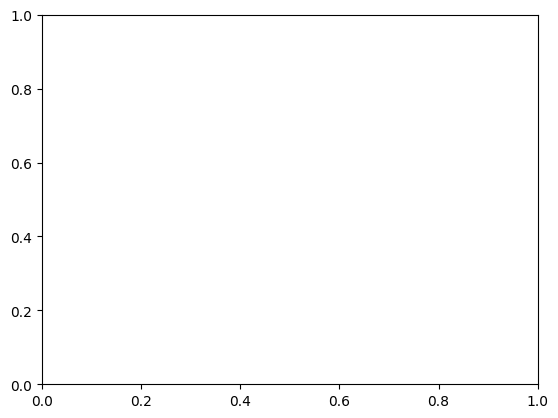